In [ ]:
# load the required packages
from tensorflow import keras # for neural networks
from sklearn.model_selection import train_test_split # for splitting data into sets
import matplotlib.pyplot as plt # for plotting

# create a function to prepare the training dataset
def prepare_dataset(train_images, train_labels):

    # normalize the RGB values to be between 0 and 1
    train_images = train_images / 255.0

    # one hot encode the training labels
    train_labels = keras.utils.to_categorical(train_labels, len(class_names))

    # split the training data into training and validation set
    train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size = 0.2, random_state=42)

    return train_images, val_images, train_labels, val_labels

# load the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# create a list of class names associated with each CIFAR-10 label
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Step 3. Prepare data

# prepare the dataset for training
train_images, val_images, train_labels, val_labels = prepare_dataset(train_images, train_labels)


170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
print('Train: Images=%s, Labels=%s' % (train_images.shape, train_labels.shape))
print('Validate: Images=%s, Labels=%s' % (val_images.shape, val_labels.shape))
print('Test: Images=%s, Labels=%s' % (test_images.shape, test_labels.shape))



Train: Images=(40000, 32, 32, 3), Labels=(40000, 10)
Validate: Images=(10000, 32, 32, 3), Labels=(10000, 10)
Test: Images=(10000, 32, 32, 3), Labels=(10000, 1)


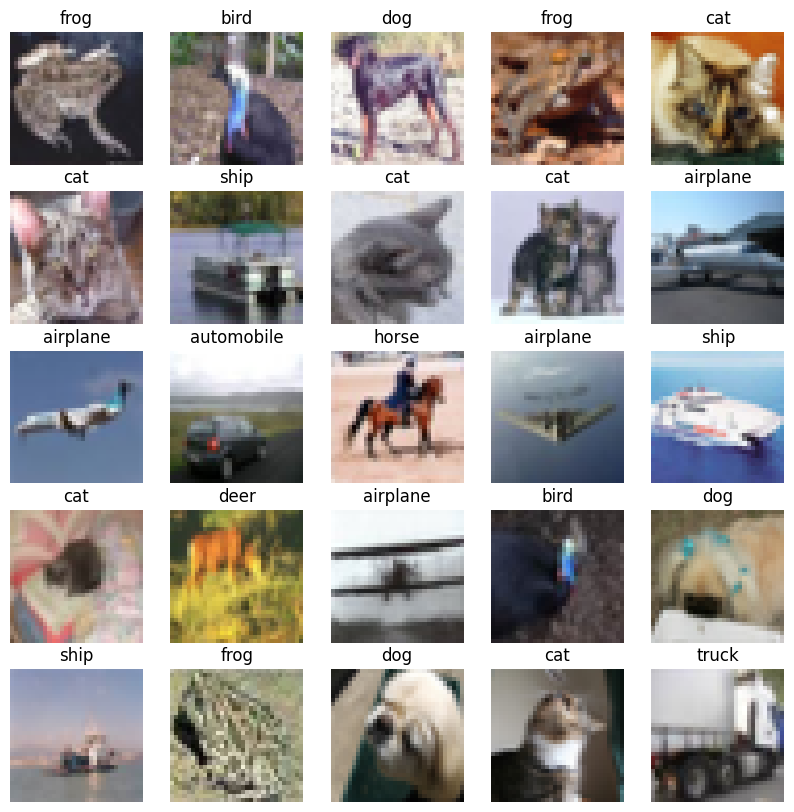

In [ ]:
# set up plot region, including width, height in inches
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))

# add images to plot
for i,ax in enumerate(axes.flat):
    ax.imshow(train_images[i])
    ax.axis('off')
    ax.set_title(class_names[train_labels[i,].argmax()])

# view plot
plt.show()


In [ ]:
def create_model_intro():

    # CNN Part 1
    # Input layer of 32x32 images with three channels (RGB)
    inputs_intro = keras.Input(shape=train_images.shape[1:])

    # CNN Part 2
    # Convolutional layer with 16 filters, 3x3 kernel size, and ReLU activation
    x_intro = keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs_intro)
    # Pooling layer with input window sized 2x2
    x_intro = keras.layers.MaxPooling2D(pool_size=(2,2))(x_intro)
    # Second Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
    x_intro = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x_intro)
    # Second Pooling layer with input window sized 2x2
    x_intro = keras.layers.MaxPooling2D(pool_size=(2,2))(x_intro)
    # Flatten layer to convert 2D feature maps into a 1D vector
    x_intro = keras.layers.Flatten()(x_intro)
    # Dense layer with 64 neurons and ReLU activation
    x_intro = keras.layers.Dense(units=64, activation='relu')(x_intro)

    # CNN Part 3
    # Output layer with 10 units (one for each class) and softmax activation
    outputs_intro = keras.layers.Dense(units=10, activation='softmax')(x_intro)

    # create the model
    model_intro = keras.Model(inputs = inputs_intro,
                              outputs = outputs_intro,
                              name = "cifar_model_intro")

    return model_intro

# create the introduction model
model_intro = create_model_intro()

# view model summary
model_intro.summary()


Model: "cifar_model_intro"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)        

In [ ]:
# compile the model
model_intro.compile(optimizer = keras.optimizers.Adam(),
                    loss = keras.losses.CategoricalCrossentropy(),
                    metrics = keras.metrics.CategoricalAccuracy())


In [ ]:
# fit the model
history_intro = model_intro.fit(x = train_images, y = train_labels,
                                batch_size = 32,
                                epochs = 10,
                                validation_data = (val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 38s 30ms/step - loss: 1.5556 - categorical_accuracy: 0.4389 - val_loss: 1.3467 - val_categorical_accuracy: 0.5189
Epoch 2/10
1250/1250 [==============================] - 32s 26ms/step - loss: 1.2648 - categorical_accuracy: 0.5522 - val_loss: 1.2609 - val_categorical_accuracy: 0.5489
Epoch 3/10
1250/1250 [==============================] - 31s 24ms/step - loss: 1.1368 - categorical_accuracy: 0.6015 - val_loss: 1.1800 - val_categorical_accuracy: 0.5786
Epoch 4/10
1250/1250 [==============================] - 32s 26ms/step - loss: 1.0511 - categorical_accuracy: 0.6327 - val_loss: 1.0731 - val_categorical_accuracy: 0.6269
Epoch 5/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.9854 - categorical_accuracy: 0.6558 - val_loss: 1.0239 - val_categorical_accuracy: 0.6385
Epoch 6/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.9353 - categorical_accuracy: 0.6735 - val_loss: 1.0072 - val_categoric

In [ ]:
# normalize test dataset RGB values to be between 0 and 1
test_images = test_images / 255.0

# make prediction for the first test image
result_intro = model_intro.predict(test_images[0].reshape(1,32,32,3))
print(result_intro)

# extract class with highest probability
print(class_names[result_intro.argmax()])


1/1 [==============================] - 0s 215ms/step
[[1.8936143e-03 1.8902007e-03 1.0783478e-02 7.8282267e-01 2.5372466e-03
  1.3503240e-01 6.1577056e-02 6.9207262e-04 2.0600969e-03 7.1116060e-04]]
cat


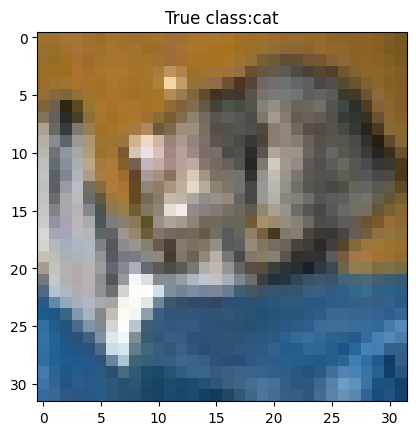

In [ ]:
# plot the first test image with its true label

# create a plot
plt.figure()

# display image
plt.imshow(test_images[0])
plt.title('True class:' + class_names[result_intro.argmax()])

# view plot
plt.show()
